# Data insight

In [1]:
from CityscapesLoader import CityscapesLoader
import matplotlib.pyplot as plt
import torch

In [2]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12.0, 8.0)

In [3]:
torch.manual_seed(42)

In [4]:
loader = CityscapesLoader()
trainSet, valSet, testSet = loader.load() 

In [5]:
sample = 17

In [6]:
trainSet[sample][0].shape

torch.Size([3, 256, 512])

In [7]:
trainSet[sample][1].shape

torch.Size([256, 512])

## Input

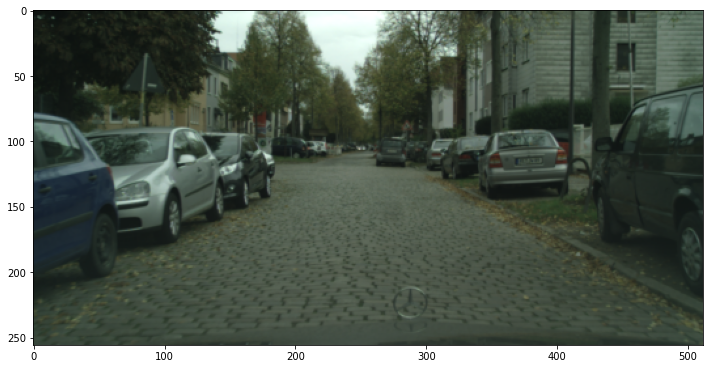

In [8]:
plt.imshow(trainSet[sample][0].permute(1,2,0))
plt.show()

## Output

In [9]:
output = trainSet[sample][1]
output[output == 255] = -1

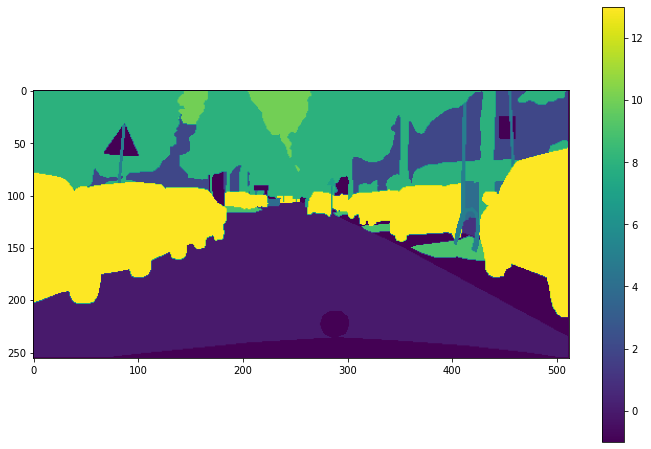

In [10]:
plt.imshow(output)
plt.colorbar()
plt.show()

In [11]:
torch.unique(trainSet[sample][1])

tensor([  0,   1,   2,   4,   5,   7,   8,   9,  10,  13, 255])

## Single class output

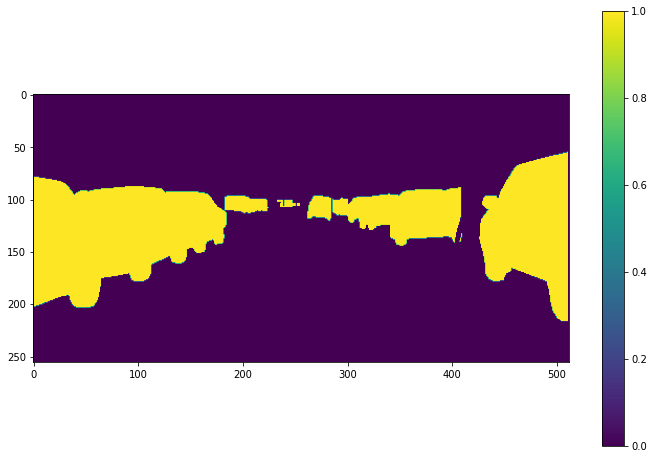

In [12]:
filterClass = 13 # 13 = car
plt.imshow(trainSet[sample][1].squeeze() == filterClass)
plt.colorbar()
plt.show()

## Existing classes

In [13]:
from torch.utils.data import DataLoader
trainLoader = DataLoader(trainSet, batch_size=64, shuffle=False)

In [14]:
missingClasses = {255} # 255 are the ignored classes
missingClasses.update(range(19)) # there are only 19 trainIds
for _, y in trainLoader:
    foundClasses = []
    for missingClass in missingClasses:
        if torch.sum(y == missingClass) > 0:
            foundClasses.append(missingClass)
    for foundClass in foundClasses:
        missingClasses.remove(foundClass)
    if len(missingClasses) == 0:
        break
    print(".", end="")
print()
if len(missingClasses) == 0:
    print("All classes were found!")


All classes were found!


## Actual test set outputs

In [11]:
testSample = 753

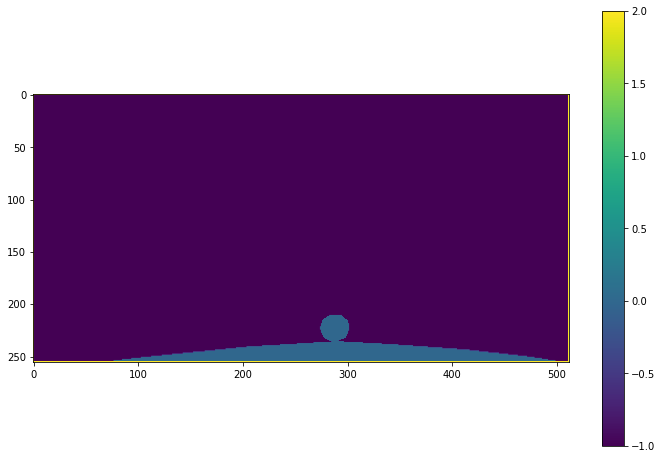

In [12]:
plt.imshow(testSet[testSample][1])
plt.colorbar()
plt.show()

In [13]:
from torch.utils.data import DataLoader
allLoader = DataLoader(testSet, batch_size=len(testSet), shuffle=False)

In [14]:
_, y_true = next(iter(allLoader))

In [15]:
torch.sum(y_true == -1) / len(y_true.flatten()) # unlabeled

tensor(0.9308)

In [16]:
torch.sum(y_true == 0) / len(y_true.flatten()) # ego vehicle

tensor(0.0457)

In [17]:
torch.sum(y_true == 2) / len(y_true.flatten()) # out of roi

tensor(0.0117)

The test set is basically unlabeled. It is kept by the creators to independently evaluate models.